In [1]:
import selenium
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
import matplotlib.pyplot as plt
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

#main for simple login into instagram
driver = webdriver.Chrome('Webdriver_path_in_your_system_using_chrome_as_a_browser')
driver.get('https://www.instagram.com/')
time.sleep(2)
username = driver.find_element_by_name('username')
username.send_keys('SAMPLE USERNAME')
time.sleep(1)
password = driver.find_element_by_name('password')
password.send_keys('SAMPLE PASSWORD')
time.sleep(1)
password.submit()
time.sleep(5)
button = driver.find_element_by_xpath('//*[@role="presentation"]/div/div/div[3]/button[2]').click()

So number of posts done by the top 5 posts in last 5 days: 
yourfoodlab 6
foodrush.recipe 0
dilsefoodie 6
foodtalkindia 6
foodie_incarnate 7


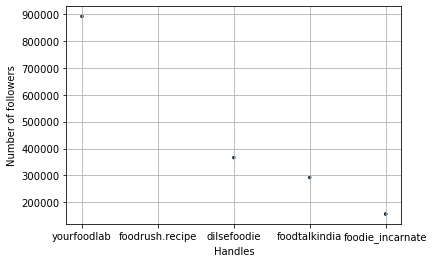

In [4]:
def allHandles(driver):
    search = driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
    search.send_keys('food')
    time.sleep(4)
    handles = []
    i = 1
    while len(handles) <= 10:
        try:
            link = '//*[@class="drKGC"]/div/a[' + str(i) + ']/div/div/div/span'
            current_handle = driver.find_element_by_xpath(link).text
            if current_handle[0] != '#':
                image = True
                try:
                    driver.find_element_by_xpath('//*[@class="drKGC"]/div/a[' + str(i) + ']/div/div/span/img')
                except NoSuchElementException:
                    image = False
                if image == True:   
                    handles.append(current_handle)
            i+=1
        except NoSuchElementException:
            break
    clear = driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[3]').click()
    return handles

followers = []
def function1part1(driver, handles):
    final_handles = []
    d = {}
    for i in range(0, len(handles)):
        search = driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
        if handles[i] == 'food':
            continue
        search.send_keys(handles[i])
        time.sleep(5)
        driver.find_element_by_xpath('//*[@class="drKGC"]/div/a/div').click()
        time.sleep(3)
        try:
            num_of_followers = driver.find_element_by_xpath('//ul[@class="k9GMp "]/li[2]/a/span').get_attribute('title')
        except NoSuchElementException:
            num_of_followers = driver.find_element_by_xpath('//ul[@class="k9GMp "]/li[2]/span/span').get_attribute('title')
        num_of_followers = int(num_of_followers.replace(',','').strip())
        followers.append(num_of_followers)
        d[num_of_followers] = handles[i]
        time.sleep(4)
    
    followers.sort(reverse = True)
    for i in range(0, 5):
        final_handles.append(d[followers[i]])
    return final_handles

def function1part2(driver, handle):
    search = driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
    search.send_keys(handle)
    time.sleep(3)
    driver.find_element_by_xpath('//*[@class="drKGC"]/div/a').click()
    time.sleep(2)
    driver.find_element_by_xpath('//article[@class="ySN3v"]/div/div/div/div/a').click()
    time.sleep(4)
    ans = 0
    while True:
        status = driver.find_element_by_xpath('//a[@class="c-Yi7"]/time')
        status = status.text
        if 'AGO' in status or 'NOW' in status:
            if 'NOW' in status:
                ans+=1
            elif 'HOURS' in status or 'HOUR' in status or 'MINUTE' in status or 'MINUTES' in status or 'SECONDS' in status:
                ans+=1
            elif 'DAY' in status or 'DAYS' in status:
                if '1' in status or '2' in status or '3' in status:
                    ans+=1
                else:
                    break
        else:
            break
        driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
        time.sleep(3)
    driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]/button').click()
    time.sleep(2)
    return ans

#main
time.sleep(2)

#fetching the top 10 handles
handles = []
handles = allHandles(driver)

#now searching for top 5
final_handles = []
final_handles = function1part1(driver, handles)

#now visiting each handle and figuring out the posts of last 3 days only
posts = []
for i in range(0, 5):
    num_of_posts = function1part2(driver, final_handles[i])
    posts.append(num_of_posts)
print('So number of posts done by the top 5 posts in last 3 days: ')
for i in range(0, 5):
    print(final_handles[i], posts[i])
followers = followers[0:5]

#now plotting the graph. I would be using bubble graph for the same.
plt.scatter(final_handles, followers, s = posts, alpha = 0.9, edgecolors =  'black', marker = 'o')
plt.ylabel('Number of followers')
plt.xlabel('Handles')
plt.grid()
plt.show()

In [17]:
def function2part1(driver, current_handle, words, words_list):
    search = driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
    search.send_keys(current_handle)
    time.sleep(3)
    driver.find_element_by_xpath('//*[@class="drKGC"]/div/a').click()
    time.sleep(2)
    driver.find_element_by_xpath('//article[@class="ySN3v"]/div/div/div/div/a').click()
    time.sleep(4)
    
    content_link = '//div[@class="EtaWk"]/ul/div/li/div/div/div[2]/span'
    for i in range(0, 10):
        content = driver.find_element_by_xpath(content_link)
        content = content.text
        content = list(content.replace('.','').split())
        for i in content:
            words[i] = words.get(i, 0) + 1
            if words[i] == 1:
                words_list.append(i)
        driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
        time.sleep(3)
    driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]/button').click()
    time.sleep(2)

#main
words = {}
words_list = []
for i in final_handles:
    function2part1(driver, i, words, words_list)

Wash 2
your 16
hands 3
thoroughly 1
and 148
stay 6
safe! 1
#SafeHands 2
challenge 4
Hello 1
people! 1
Hope 1
everyone's 1
in 70
good 7
health 2
A 3
lot 7
has 7
being 2
going 4
on 30
since 1
a 79
couple 2
of 74
weeks 1
As 1
humanity, 1
we 6
are 18
through 2
tough 1
time 2
While 3
don't 2
really 3
have 8
solution 1
to 44
this 37
what 1
can 3
do 3
as 18
collective 1
measure 1
is 41
positive, 1
home 8
clean 1
And 5
while 1
government 1
institutes, 1
relevant 1
organizations 1
all 10
doing 1
their 6
due 1
dealing 2
with 44
the 140
situation, 2
I 12
took 1
up 5
WHO 1
way 3
educate 1
everyone 1
about 1
safe 3
hand 4
washing 2
rubbing 1
techniques, 1
that 10
fundamental 1
towards 1
self-containment 1
germ 1
exposure 1
influence 1
This 8
least 2
could 3
for 40
people 2
around 2
us, 1
our 3
family 2
friends 2
So 1
much 5
possible 3
wash 1
frequently 1
Prayers 1
lives 1
lost 1
who 1
infected 1
fighting 1
Hoping 1
overcome 1
situation 1
very 5
soon 1
Stay 3
positive 1
@ranveerbrar 1
@saranshgoila 

Generally used Hashtags:

#SafeHands
#safehands
#safeHands
#covıd19
#recipe
#foodie
#indiancuisine
#foodieofinstagram
#indian
#sanjyotkeer
#streetfood
#mumbaistreetfood
#comfortfood
#recipes
#mumbaifoodie
#yourfoodlab
#indianfood
#instafoodie
#eggetarians
#chef
#indochinese
#chinese
#cooking
#foodporn
#cheesy
#baked
#smartcocktailtwist
#DrinkResponsibly
#DspBlack
#spon
#SmartCocktailTwist
#foodrush
#appetizer
#chinesefood
#spicy
#easyrecipes
#bread
#schezwan
#holi
#sweet
#dryfruits
#traditionalfood
#festivalofcolours
#pasta
#spinach
#spinachpasta
#veggiepasta
#palak
#pastarecipe
#greenpasta
#panipuri
#streetfoodofindia
#chaat
#noodles
#garlic
#fenugreek
#creamy
#peas
#desikhana
#punjabi
#dosa
#southindianfood
#cheese
#biryani
#vegetarianrecipes
#rice
#potato
#lollipop
#chutney
#paneer
#strawberry
#desserts
#valentinesday2020
#egglessbaking
#Dilsefoodie
#omsweets
#CoronoGoGoGo
#coronacovid19
#amritsar
#food
#dateyourself
#foodielife
#goldgym
#gym
#bullet
#royalenfield
#classic
#nagpur
#

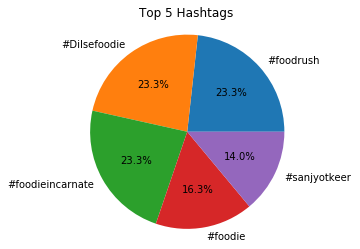

In [38]:
import csv
import pandas as pd

final_words_list = []
hashtags = []
for i in words_list:
    new_list = []
    new_list.append(i)
    new_list.append(words[i])
    final_words_list.append(new_list)
    #checking for hashtags
    if i[0] == '#':
        hashtags.append(i)

#dataframe created with the name WordsFile
WordsFile = pd.DataFrame(final_words_list, columns=['Word','Frequency'])

#finally printing the hashtags
hashes = {}
print('Generally used Hashtags:')
print('')
for i in hashtags:
    hashes[i] = words[i]
    print(i)
hashes = {k: v for k, v in sorted(hashes.items(), key=lambda item: item[1], reverse = True)}
count = 1
final_hashes = []
freq = []
for i in hashes:
    final_hashes.append(i)
    freq.append(hashes[i])
    count+=1
    if count == 6:
        break

#plotting the pie chart of top 5 hashes
plt.pie(freq, labels = final_hashes, autopct = "%1.1f%%")
plt.axis('equal')
plt.title('Top 5 Hashtags')
plt.show()

[59.08688576645233, 32.41432380504254, 51.63117168670453, 171.95881141512209, 48.870220887303674]


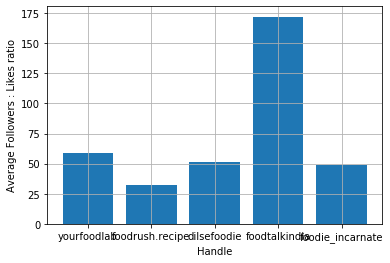

In [48]:
def function3(driver, current_handle):
    search = driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
    search.send_keys(current_handle)
    time.sleep(3)
    driver.find_element_by_xpath('//*[@class="drKGC"]/div/a').click()
    time.sleep(2)
    driver.find_element_by_xpath('//article[@class="ySN3v"]/div/div/div/div/a').click()
    time.sleep(4)
    
    view_link = '//span[@class="vcOH2"]'
    likes_link = '//div[@class="Nm9Fw"]/button/span'
    total = 0
    for i in range(0, 10):
        try:
            likes = driver.find_element_by_xpath(likes_link)
            num_of_likes = likes.text
        except NoSuchElementException:
            driver.find_element_by_xpath(view_link).click()
            time.sleep(1)
            likes = driver.find_element_by_xpath('//div[@class="vJRqr"]/span')
            num_of_likes = likes.text
            driver.find_element_by_xpath('//div[@class="QhbhU"]').click()
            time.sleep(1)
        num_of_likes = int(num_of_likes.replace(',','').strip())
        total+=num_of_likes
        driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
        time.sleep(3)
    
    #average of likes taken
    total/=10
    driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]/button').click()
    time.sleep(2)
    
    #now calculating the number of followers
    num_of_followers = driver.find_element_by_xpath('//ul[@class="k9GMp "]/li[2]/a/span').get_attribute('title')
    num_of_followers = int(num_of_followers.replace(',','').strip())
    
    #now calculating the ratio
    ratio = num_of_followers/total
    return ratio

#main
ratios = []
for i in final_handles:
    temp = function3(driver, i)
    ratios.append(temp)

plt.bar(final_handles, ratios)
plt.xlabel('Handle')
plt.ylabel('Average Followers : Likes ratio')
plt.xticks(rotation = 90)
plt.show()